In [1]:
import os,sys,json
from utils import *

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd

In [2]:
# num of grant by division
def plot_num_amount(years, filename):
    years = range(2000, 2020, 1)
    grant_div_data = load_grant_data(filename)
    grant_div_types = set()
    for v in grant_div_data.values():
        grant_div_types.update(v["count"].keys())

    index = pd.Index(years, name='Year')
    data_c = {g:[] for g in grant_div_types}
    data_a = {g:[] for g in grant_div_types}
    for y in years:
        for g in grant_div_types:
            data_c[g].append(grant_div_data[str(y)]["count"][g] if g in grant_div_data[str(y)]["count"] else 0)
            data_a[g].append(grant_div_data[str(y)]["amount"][g] if g in grant_div_data[str(y)]["amount"] else 0)

    df = pd.DataFrame(data_c, index=index)
    ax = df.plot(kind='bar', stacked=True, figsize=(12, 5))
    ax.set_ylabel('Number of Awards')
    plt.title("Standard grant - Number of awards by division type")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

    df = pd.DataFrame(data_a, index=index)
    ax = df.plot(kind='bar', stacked=True, figsize=(12, 5))
    ax.set_ylabel('Amount of Awards')
    plt.title("Amount of awards by grant type")
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

In [3]:
def plot_avg_grant(years, top_types, filename):
    grant_data = load_grant_data(filename)
    index = pd.Index(years, name='Year')
    data = {g:[] for g in top_types}
    for y in years:
        for g in top_types:
            data[g].append(grant_data[str(y)]["amount"][g]/grant_data[str(y)]["count"][g] if g in grant_data[str(y)]["amount"] else 0)
    df = pd.DataFrame(data, index=index)
    ax = df.plot(kind='bar', stacked=False, figsize=(18, 5))
    ax.set_xlabel('Amount of Awards')
    plt.title("Average amount of awards by grant type")
    plt.show()

# Number/Amont of awards vs Year - Award type

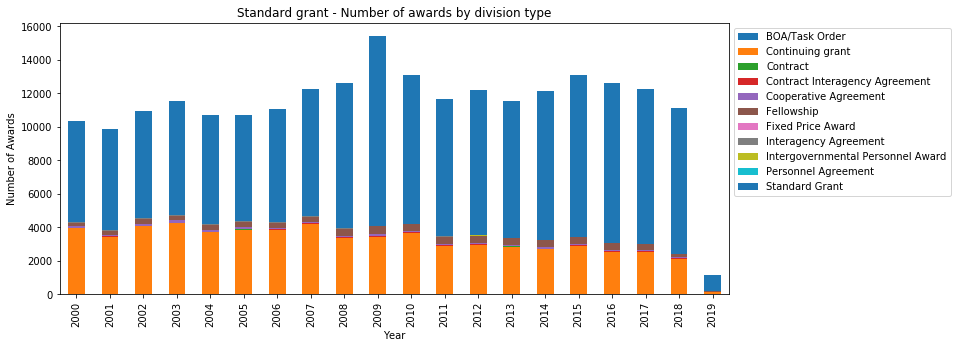

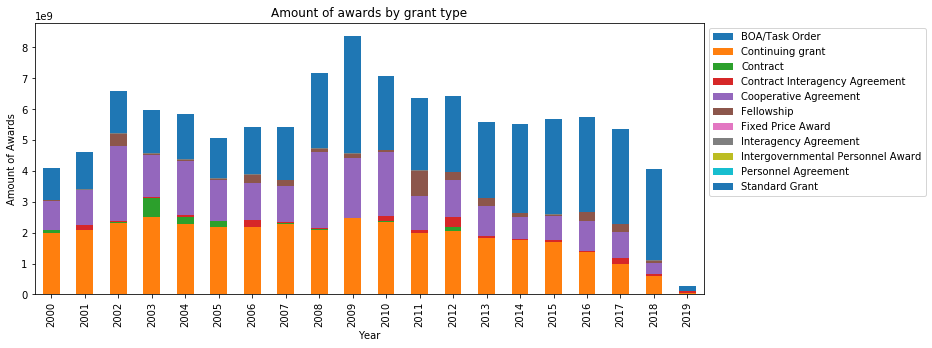

In [4]:
plot_num_amount(range(2000, 2020, 1), "summary.json")

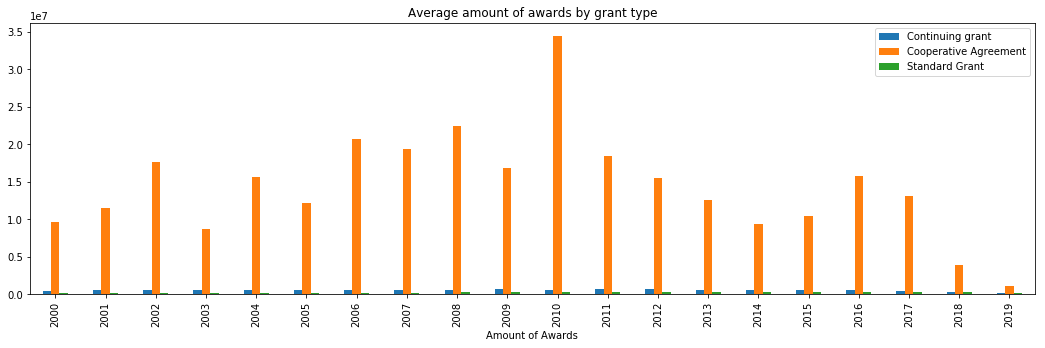

In [5]:
plot_avg_grant(range(2000, 2020, 1), ["Standard Grant", "Continuing grant", "Cooperative Agreement"], "summary.json")

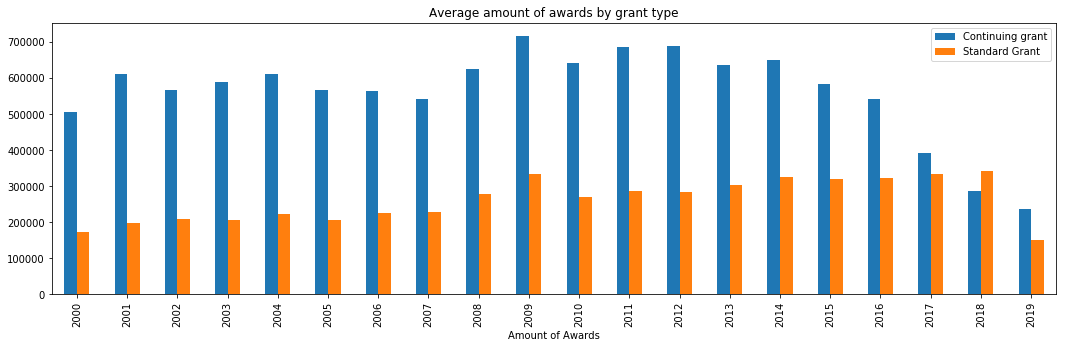

In [6]:
plot_avg_grant(range(2000, 2020, 1), ["Standard Grant", "Continuing grant"], "summary.json")

# Number/Amont of awards vs Year - Division type

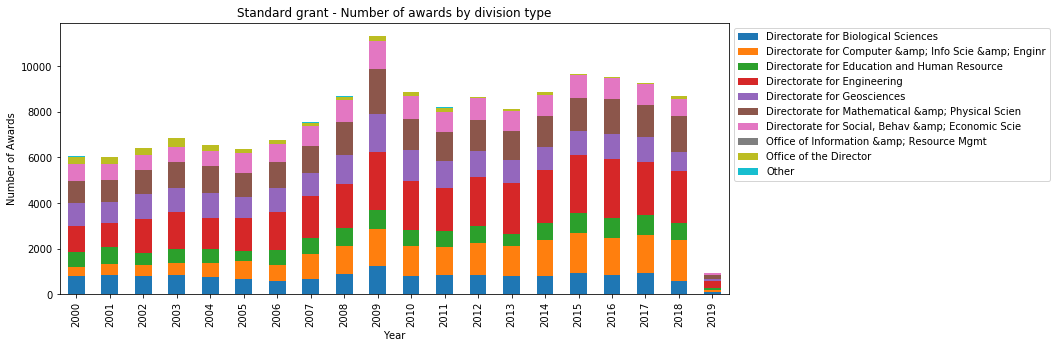

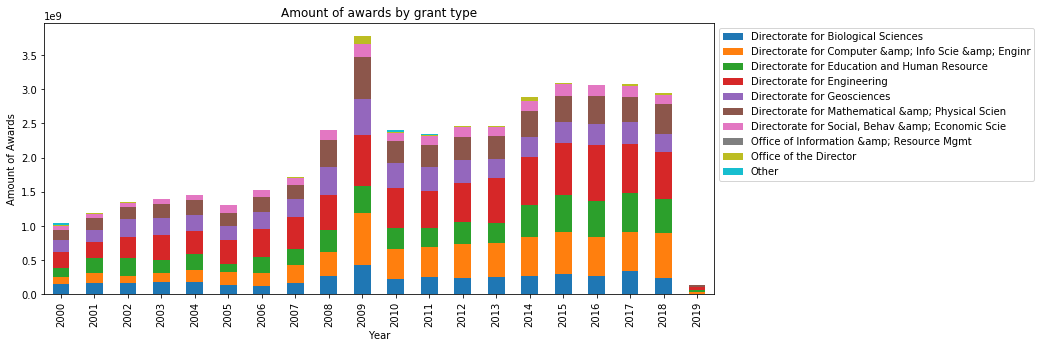

In [7]:
plot_num_amount(range(2000, 2020, 1), "summary_stnd_div.json")

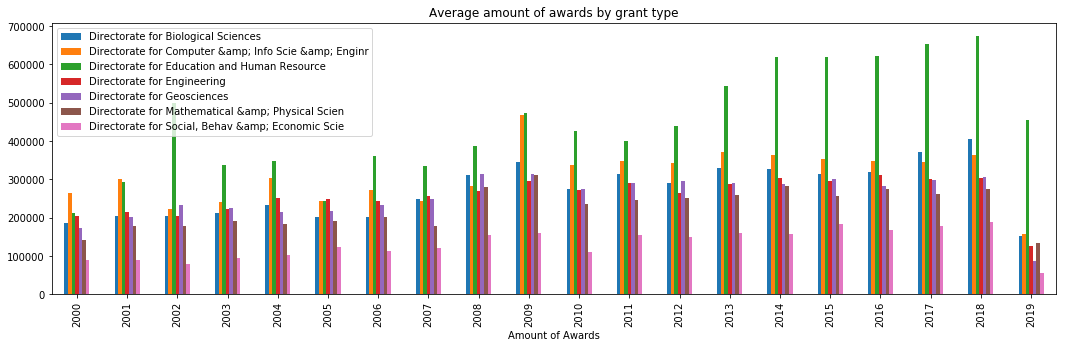

In [8]:
top_div = [
"Directorate for Mathematical &amp; Physical Scien",
"Directorate for Social, Behav &amp; Economic Scie",
"Directorate for Education and Human Resource",
"Directorate for Computer &amp; Info Scie &amp; Enginr",
"Directorate for Geosciences",
"Directorate for Engineering",
"Directorate for Biological Sciences"]
plot_avg_grant(range(2000, 2020, 1), top_div, "summary_stnd_div.json")

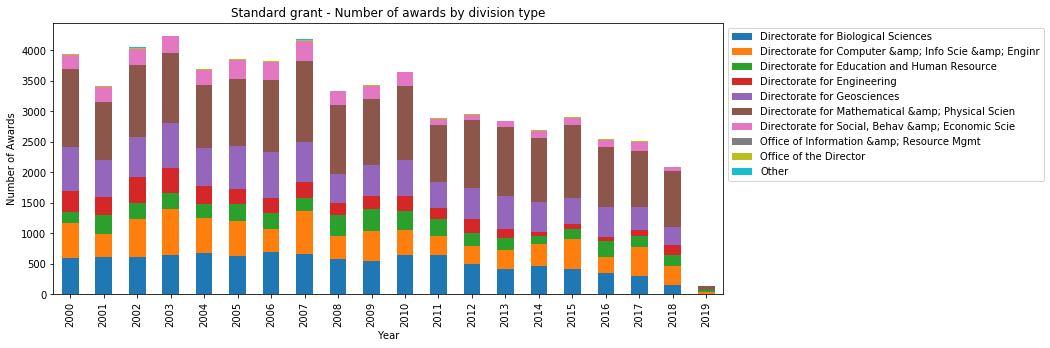

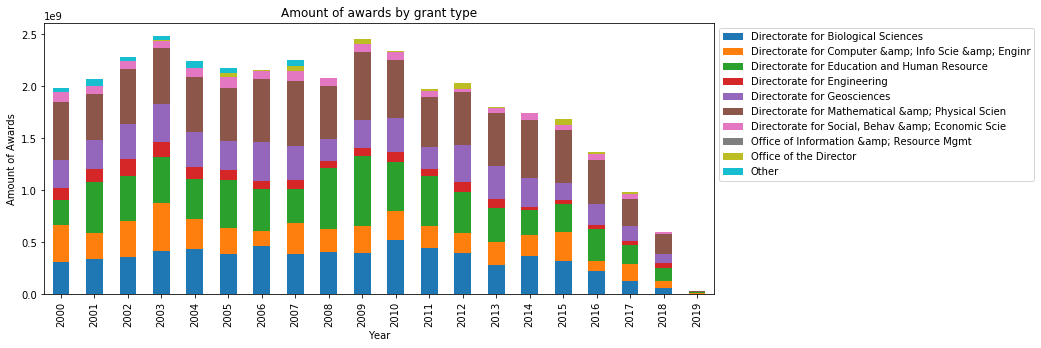

In [9]:
plot_num_amount(range(2000, 2020, 1), "summary_cont_div.json")

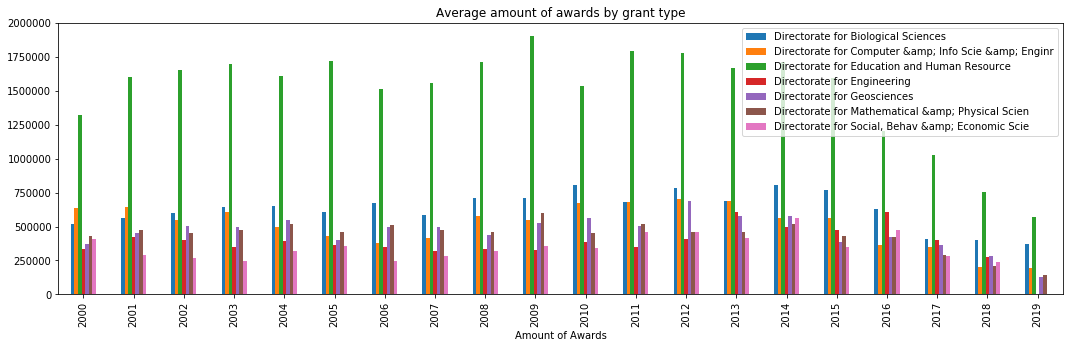

In [10]:
plot_avg_grant(range(2000, 2020, 1), top_div, "summary_cont_div.json")

In [11]:
grant_types = ["Intergovernmental Personnel Award",
               "Fixed Price Award",
               "Contract", 
               "Fellowship", 
               "Standard Grant", 
               "BOA/Task Order", 
               "Personnel Agreement",
               "Cooperative Agreement",
               "Continuing grant",
               "Interagency Agreement", 
               "Contract Interagency Agreement"]
colors = 5*["b", "orange", "g", "r", "olive", "teal", "c", "m"]
def numpub_plot(style, year_of_interest, grant_types, types_of_grant, xlim=None, ylim=None):
    numpub_data = load_numpub_data(year_of_interest)
    filtered_data = [v for v in numpub_data.values() if v["amount"] > 0 and v[style] in types_of_grant]
    N = len(filtered_data)
    area = [v["duration"]/10 for v in filtered_data]

    plt.figure(figsize=(18,4))
    plt.title((" & ".join(types_of_grant))[:50] + " " + str(year_of_interest))
    plt.ylabel("Number of publications")
    plt.xlabel("Log of grant amount")
    all_x = []
    all_y = []
    for t in types_of_grant:
        x = np.log10([v["amount"] for v in filtered_data if v[style] == t])
        all_x.extend([v["amount"] for v in filtered_data if v[style] == t])
        y = [v["num_pubs"] for v in filtered_data if v[style] == t]
        all_y.extend([v["num_pubs"] for v in filtered_data if v[style] == t])
        area = [v["duration"]/10 for v in filtered_data if v[style] == t]
        plt.scatter(x, y, s=area, alpha=0.5, color=colors[list(grant_types).index(t)])
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    plt.autoscale(False)
    median = np.median(all_x)
    average = np.average(all_x)
    print("[X] median: {}, average: {}".format(median, average))
    print("[Y] median: {}, average: {}".format(np.median(all_y), np.average(all_y)))
    plt.plot([np.log10(median), np.log10(median)], plt.gca().get_ylim(), 'k--', color = 'k')
    plt.plot([np.log10(average), np.log10(average)], plt.gca().get_ylim(), 'k-', color = 'k')
    plt.show()
              
def numpub_amount_plot(year_of_interest, types_of_grant, xlim=None, ylim=None):
    return numpub_plot("type", year_of_interest, grant_types, types_of_grant, xlim=xlim, ylim=ylim)

def numpub_amount_plot_div(year_of_interest, div_of_grant, xlim=None, ylim=None):
    return numpub_plot("div", year_of_interest, top_div, div_of_grant, xlim=xlim, ylim=ylim)

# Number of publication vs Amount - Award type

[X] median: 274325.0, average: 543145.80972
[Y] median: 2.0, average: 6.46404076034


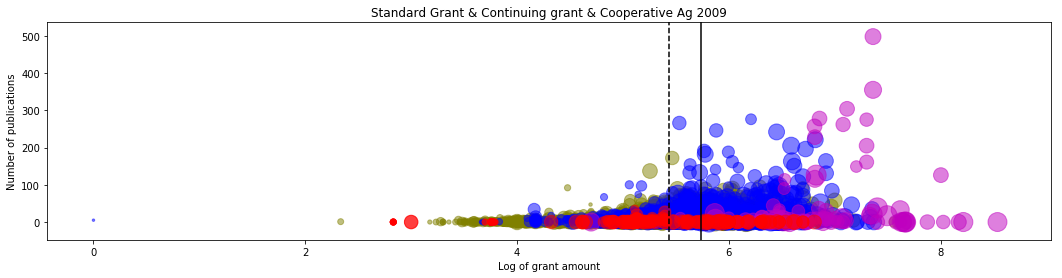

In [12]:
numpub_amount_plot(2009, ["Standard Grant", "Continuing grant", "Cooperative Agreement", "Fellowship"])

[X] median: 221150.0, average: 334557.675449
[Y] median: 1.0, average: 4.8508531518


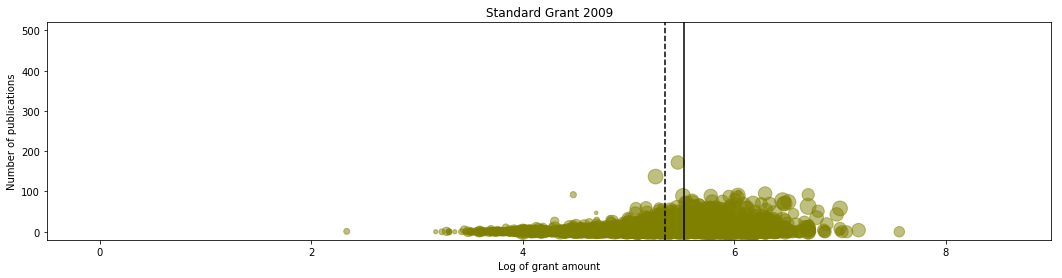

In [13]:
numpub_amount_plot(2009, ["Standard Grant"], xlim=[-0.5,9], ylim=[-20,520])

[X] median: 430000.0, average: 717402.644334
[Y] median: 6.0, average: 11.4826682202


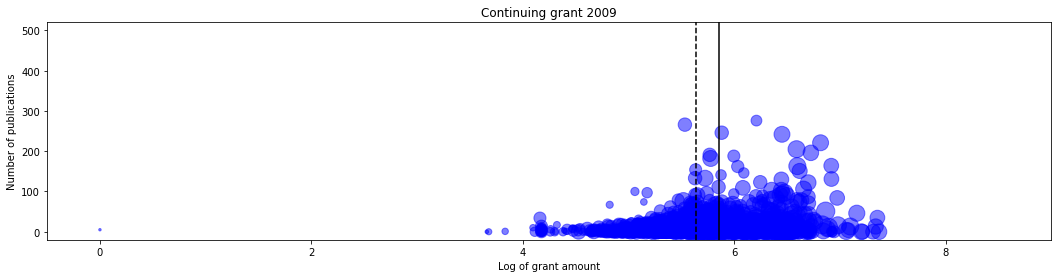

In [14]:
numpub_amount_plot(2009, ["Continuing grant"], xlim=[-0.5,9], ylim=[-20,520])

[X] median: 5000000.0, average: 17844527.0826
[Y] median: 4.0, average: 38.1651376147


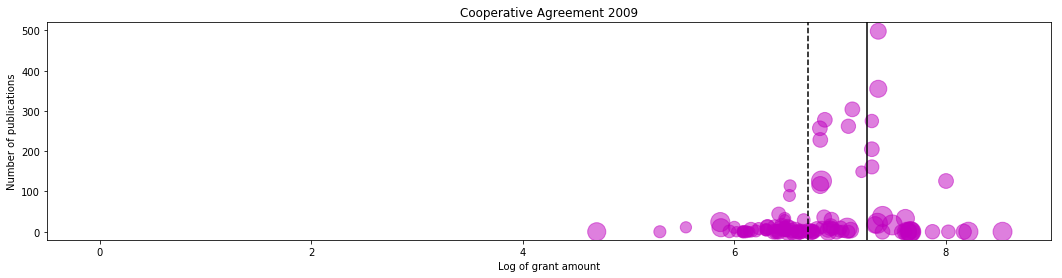

In [15]:
numpub_amount_plot(2009, ["Cooperative Agreement"], xlim=[-0.5,9], ylim=[-20,520])

[X] median: 123000.0, average: 269606.587719
[Y] median: 0.0, average: 1.11842105263


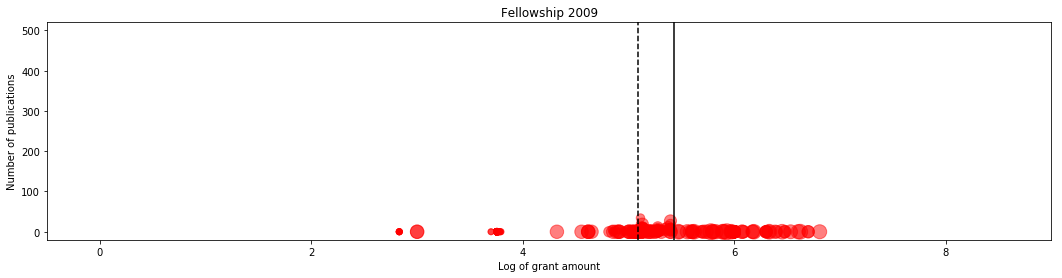

In [16]:
numpub_amount_plot(2009, ["Fellowship"], xlim=[-0.5,9], ylim=[-20,520])

/Users/minjeongshin/miniconda2/lib/python2.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


[X] median: 248674.0, average: 529115.350527
[Y] median: 2.0, average: 6.59350219416


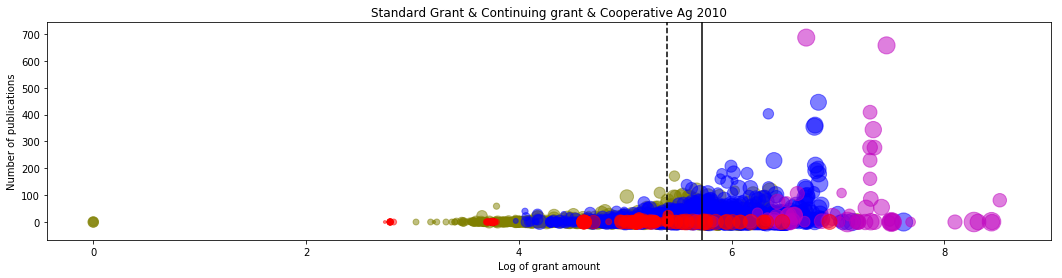

In [17]:
numpub_amount_plot(2010, ["Standard Grant", "Continuing grant", "Cooperative Agreement", "Fellowship"])

[X] median: 258567.0, average: 540576.006492
[Y] median: 2.0, average: 6.93412966329


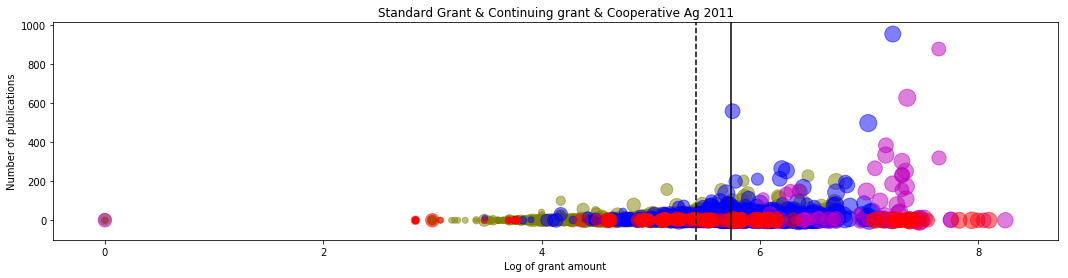

In [18]:
numpub_amount_plot(2011, ["Standard Grant", "Continuing grant", "Cooperative Agreement", "Fellowship"])

[X] median: 173889.0, average: 388470.96224
[Y] median: 0.0, average: 0.641428432042


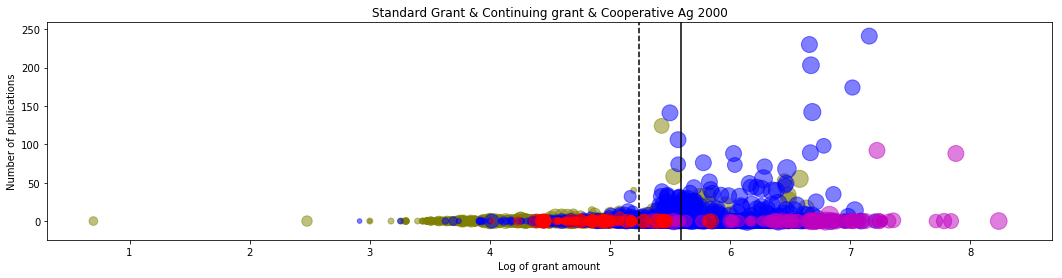

In [19]:
numpub_amount_plot(2000, ["Standard Grant", "Continuing grant", "Cooperative Agreement", "Fellowship"])

# Number of publication vs Amount - Division type

[X] median: 282015.0, average: 540065.521555
[Y] median: 2.0, average: 6.38059049028


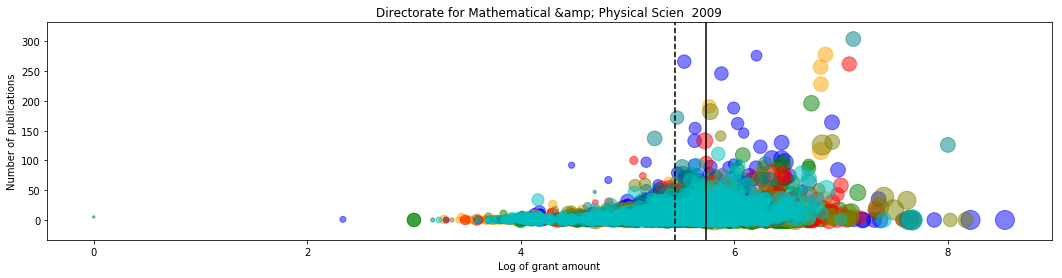

In [20]:
numpub_amount_plot_div(2009, top_div)

[X] median: 366845.0, average: 555589.929417
[Y] median: 3.0, average: 6.0956892468


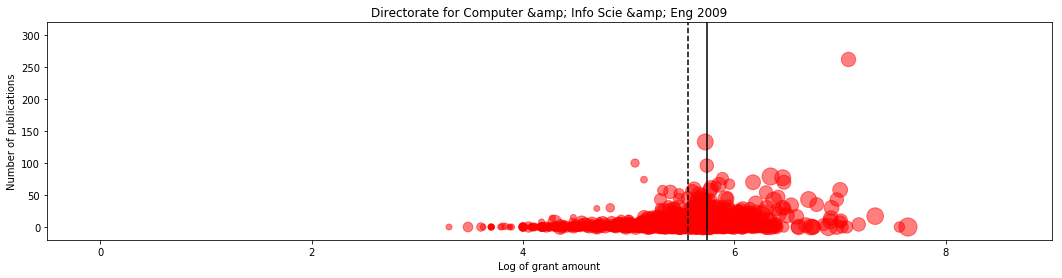

In [21]:
numpub_amount_plot_div(2009, ["Directorate for Computer &amp; Info Scie &amp; Enginr"], xlim=[-0.5,9], ylim=[-20,320])

[X] median: 259019.0, average: 611881.650948
[Y] median: 2.0, average: 5.43234905245


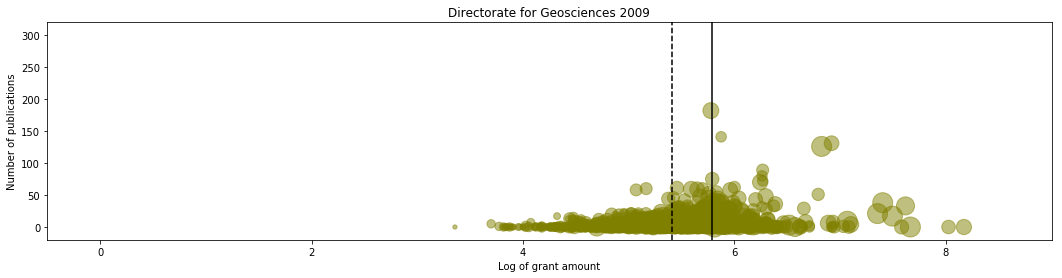

In [22]:
numpub_amount_plot_div(2009, ["Directorate for Geosciences"], xlim=[-0.5,9], ylim=[-20,320])

[X] median: 293304.0, average: 638625.828826
[Y] median: 6.0, average: 10.9048679605


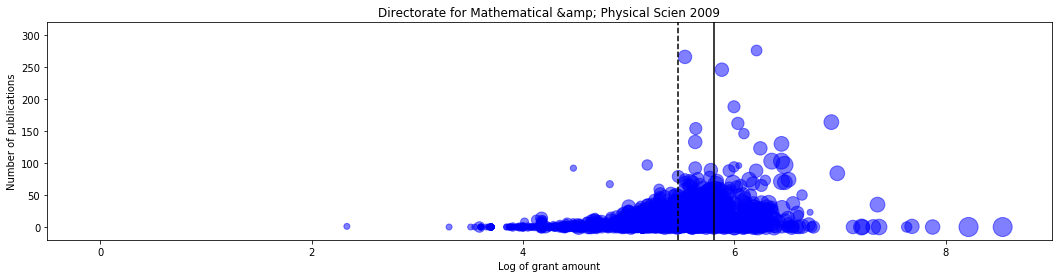

In [23]:
numpub_amount_plot_div(2009, ["Directorate for Mathematical &amp; Physical Scien"], xlim=[-0.5,9], ylim=[-20,320])

[X] median: 499758.0, average: 919426.913912
[Y] median: 0.0, average: 2.45887778632


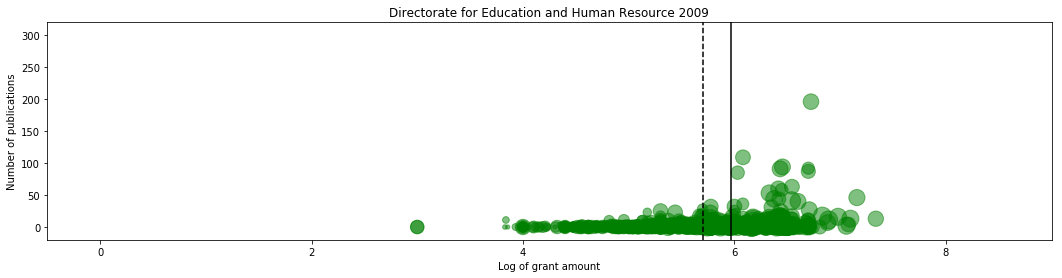

In [24]:
numpub_amount_plot_div(2009, ["Directorate for Education and Human Resource"], xlim=[-0.5,9], ylim=[-20,320])

[X] median: 339647.0, average: 495073.79338
[Y] median: 4.0, average: 6.95888948211


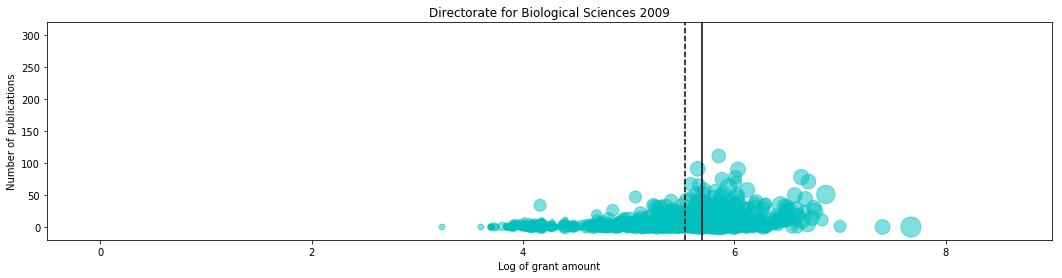

In [25]:
numpub_amount_plot_div(2009, ["Directorate for Biological Sciences"], xlim=[-0.5,9], ylim=[-20,320])

[X] median: 249790.5, average: 372851.573465
[Y] median: 1.0, average: 5.19334795322


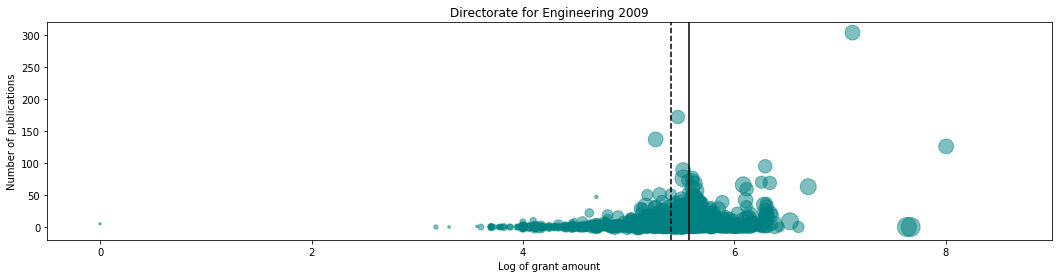

In [26]:
numpub_amount_plot_div(2009, ["Directorate for Engineering"], xlim=[-0.5,9], ylim=[-20,320])

[X] median: 120000.0, average: 221625.291086
[Y] median: 0.0, average: 3.4561281337


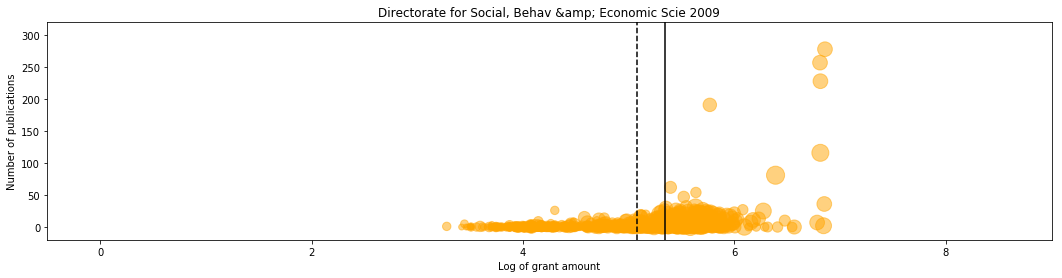

In [27]:
numpub_amount_plot_div(2009, ["Directorate for Social, Behav &amp; Economic Scie"], xlim=[-0.5,9], ylim=[-20,320])